In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [14]:
breast_ca = datasets.load_breast_cancer()
# breast_ca

In [15]:
print(breast_ca.keys())
print(breast_ca["DESCR"])
print(breast_ca["feature_names"])
print(breast_ca["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were c

In [31]:
X = breast_ca.data
y = breast_ca.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# SVC with Gaussian RBF Kernel

In [32]:
# Feature scaling for SVC
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Train and fit the model: SVC with Gaussian RBF Kernel
svc_clf = SVC(kernel="rbf", gamma="auto", C=1, max_iter=-1).fit(X_train_scaled, y_train)

# Evaluate the model's accuracy
print("For SVC with Gaussian RBF Kernel model:")
print("Train set accuracy = " + str(svc_clf.score(X_train_scaled, y_train)))
print("Test set accuracy = " + str(svc_clf.score(X_test_scaled, y_test)))

For SVC with Gaussian RBF Kernel model:
Train set accuracy = 0.9899497487437185
Test set accuracy = 0.9707602339181286


# Decision tree


In [34]:
# Train and fit the model: decision tree
tree_clf = DecisionTreeClassifier(max_depth=None).fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Decision Tree model:")
print("Train set accuracy = " + str(tree_clf.score(X_train, y_train)))
print("Test set accuracy = " + str(tree_clf.score(X_test, y_test)))

# Determine features' importances
print("\nImportance of each feature:\n", tree_clf.feature_importances_)

For Decision Tree model:
Train set accuracy = 1.0
Test set accuracy = 0.9415204678362573

Importance of each feature:
 [0.         0.00858198 0.         0.         0.01064558 0.
 0.         0.02222751 0.         0.         0.         0.
 0.00715165 0.00352815 0.         0.02896418 0.         0.
 0.         0.00893956 0.         0.10055069 0.78864361 0.
 0.         0.         0.         0.02076709 0.         0.        ]


# Random forest

In [35]:
# Train and fit the model: random forest classifier
rforest_clf = RandomForestClassifier().fit(X_train, y_train)

# Evaluate the model's accuracy
print("For Random Forest model:")
print("Train set accuracy = " + str(rforest_clf.score(X_train, y_train)))
print("Test set accuracy = " + str(rforest_clf.score(X_test, y_test)))

# Determine features' importances
print("\nImportance of each feature:\n", rforest_clf.feature_importances_)

For Random Forest model:
Train set accuracy = 1.0
Test set accuracy = 0.9473684210526315

Importance of each feature:
 [0.05041501 0.01427093 0.09137092 0.05780813 0.0056804  0.01989562
 0.0377225  0.09905623 0.00390411 0.00266123 0.00489153 0.0050742
 0.00566808 0.03894372 0.00434339 0.00316629 0.0032661  0.00838187
 0.00241011 0.00491501 0.0765159  0.02298483 0.13169309 0.13287989
 0.00916374 0.03044762 0.01880918 0.10235371 0.00715024 0.00415643]


# Decision boundary

In [36]:
# Choose only X from column 7 and 20
X_selected = breast_ca.data[:, [7,20]]
print(X_selected[:3, :])

[[ 0.1471  25.38   ]
 [ 0.07017 24.99   ]
 [ 0.1279  23.57   ]]


In [37]:
# Split the selected data into train and test set
X_train_select, X_test_select, y_train, y_test = train_test_split(X_selected, y, random_state=42)

# Train and fit the model: decision tree
rforest_clf = RandomForestClassifier(n_estimators=50).fit(X_train_select, y_train)

# Evaluate the model's accuracy
print("For Random Forest model (with selected X):")
print("Train set accuracy = " + str(rforest_clf.score(X_train_select, y_train)))
print("Test set accuracy = " + str(rforest_clf.score(X_test_select, y_test)))

For Random Forest model (with selected X):
Train set accuracy = 1.0
Test set accuracy = 0.916083916083916


0 means malignant
1 means benign


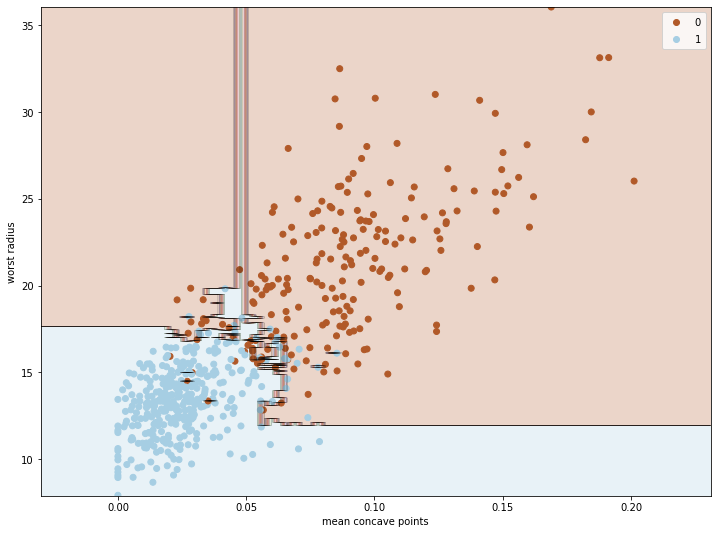

In [38]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, cmap='Paired_r'):
    h = 0.003  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,9))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    scatter = plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap);  # Data points
    plt.xlabel(breast_ca.feature_names[7])
    plt.ylabel(breast_ca.feature_names[20])
    plt.legend(*scatter.legend_elements())

plot_decision_boundary(rforest_clf, X_selected, y)

# Help remind legend names
count = 0

for i in breast_ca["target_names"]:
    print(count, "means", i)
    count += 1
